Krista Miller
Data Visualizations Assignment 4

Using free and open source tools, provide a set of choropleth visualizations for each of the columns containing dates such that the resulting visualizations (48 states only) tell the story by conveying through color or texture or both the timelines of achievement of each milestone/column in the provided dataset. Missing data is of particular interest in that when a state has never achieved a given milestone, that should be indicated in a stand-out manner such as cross-hatching.  Consider that the publication may be grey-scale.  Provide a solution for that as well.  Provide the titles, labels, and legends necessary for clarification.  File support is given as follows:  SturmCodebook has the explanation.  SturmData is the data CSV.


In [1]:
import pandas as pd
import folium
import pandas as pd
import geopandas as gpd
import geoplot 
import matplotlib.pyplot as plt


df=gpd.read_file('states_geo.json')  # read states json file

# create dictionary from state name to ad1_code
df2=gpd.read_file('natural-earth-us-states-provinces-1110m.geojson')  # the states_geo does not have the state abbreviation
dfnew = pd.merge(df,df2,right_on='adm1_cod_1',left_on='adm1_code')  # merge the two files on the adm1 code
statedict = dict(zip(dfnew['adm1_cod_1'], dfnew['iso_3166_2'].str.split('-',expand=True)[1]))  # create an adm1 code to state abbrev dictionary

df.replace({'adm1_code':statedict}, inplace=True)  # replace all the adm1 codes with the state abbreviation
#print(df.head())
sturm = pd.read_csv('SturmData.csv')  # read the Sturm data

dfjoined = pd.merge(df, sturm,left_on='adm1_code',right_on='state',how='inner')  # merge Sturm data with geo data on state abbreviation
display(dfjoined)

,scalerank,featurecla,adm1_code,geometry,state,fips,icpsr,debtfree,effectivemwpa,earnings,wills,soletrader
0,2,Admin-1 scale rank,MN,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN,27,33,1866.0,1869.0,1869.0,1869.0,1874.0
1,2,Admin-1 scale rank,MT,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT,30,64,1864.0,1887.0,1887.0,NaN,1874.0
2,2,Admin-1 scale rank,ND,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND,38,36,1862.0,1877.0,NaN,1877.0,1877.0
3,2,Admin-1 scale rank,ID,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID,16,63,1887.0,1903.0,1915.0,1887.0,1887.0
4,2,Admin-1 scale rank,WA,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA,53,73,1860.0,1881.0,1881.0,1889.0,1889.0
5,2,Admin-1 scale rank,AZ,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",AZ,4,61,1864.0,1871.0,1973.0,NaN,1871.0
6,2,Admin-1 scale rank,CA,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",CA,6,71,1850.0,1872.0,1872.0,1874.0,1872.0
7,2,Admin-1 scale rank,CO,"POLYGON ((-102.05017 40.00082, -102.04012 38.4...",CO,8,62,1861.0,1861.0,1861.0,1874.0,1874.0
8,2,Admin-1 scale rank,NV,"POLYGON ((-114.03053 36.99410, -114.02363 36.1...",NV,32,65,1873.0,1873.0,1873.0,1873.0,1873.0
9,2,Admin-1 scale rank,NM,"POLYGON ((-103.00161 33.87995, -103.00161 31.9...",NM,35,66,1884.0,1884.0,NaN,NaN,NaN


4


C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


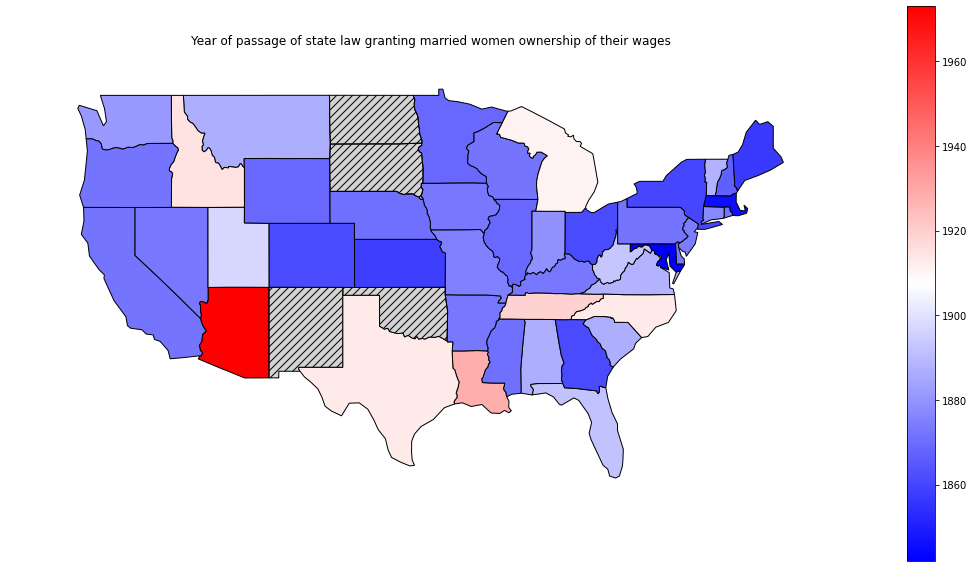

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


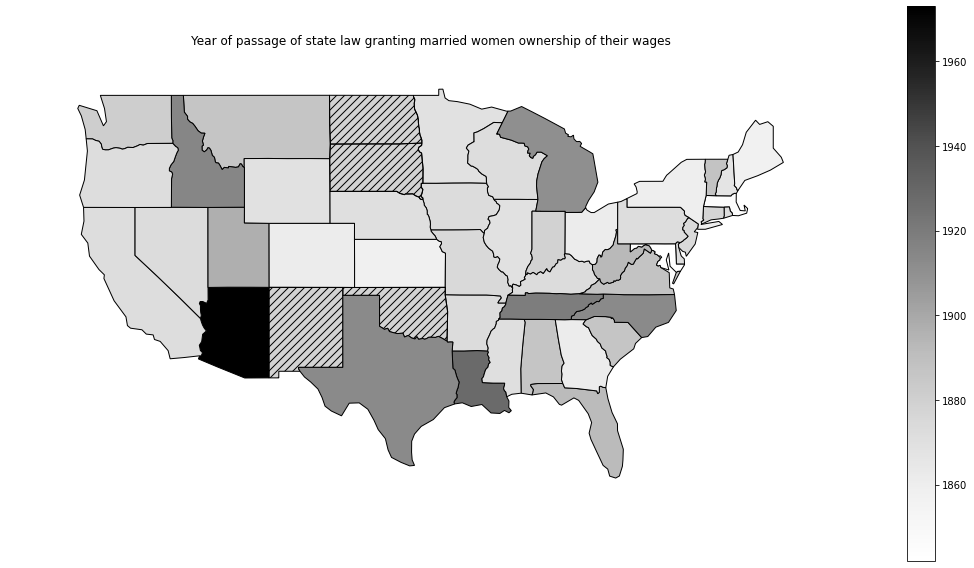

In [2]:
#earnings – Year of passage of state law granting married women ownership of their wages or earnings on par with other separate property
print(dfjoined['earnings'].isna().sum())
ax=geoplot.choropleth(
    dfjoined, hue=dfjoined['earnings'],
    cmap='bwr', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.earnings.isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title('Year of passage of state law granting married women ownership of their wages')
plt.tight_layout()
plt.show()

#greyscale for publication:
ax2=geoplot.choropleth(
    dfjoined, hue=dfjoined['earnings'],
    cmap='Greys', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.earnings.isna()].plot(color='lightgrey', hatch='///', ax=ax2)
plt.title('Year of passage of state law granting married women ownership of their wages')
plt.tight_layout()
plt.show()

1


C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


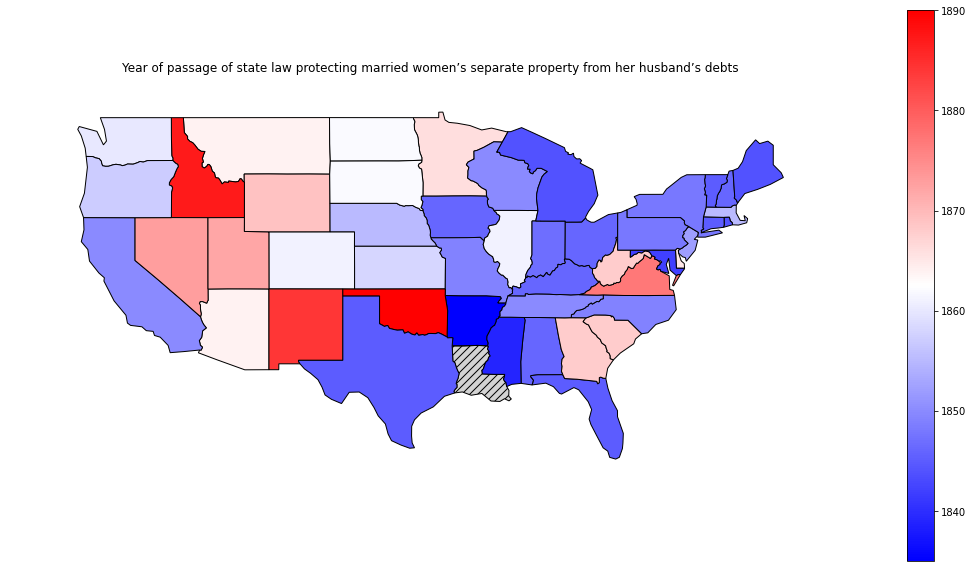

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


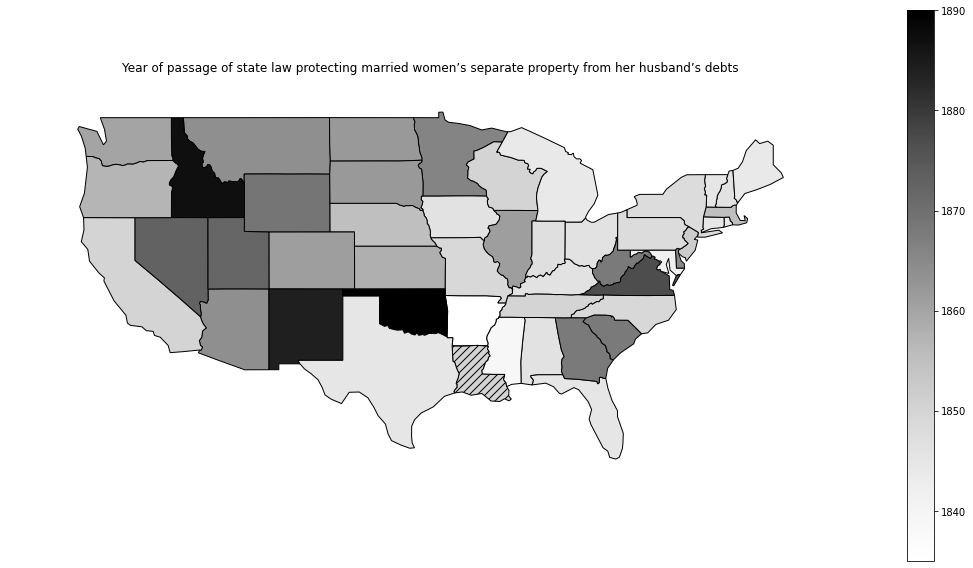

In [3]:
#debtfree – Year of passage of state law protecting married women’s separate property from her husband’s debts
print(dfjoined['debtfree'].isna().sum())
ax=geoplot.choropleth(
    dfjoined, hue=dfjoined['debtfree'],
    cmap='bwr', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.debtfree.isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title('Year of passage of state law protecting married women’s separate property from her husband’s debts')
plt.tight_layout()
plt.show()

#greyscale for publication:
ax4=geoplot.choropleth(
    dfjoined, hue=dfjoined['debtfree'],
    cmap='Greys', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.debtfree.isna()].plot(color='lightgrey', hatch='///', ax=ax4)
plt.title('Year of passage of state law protecting married women’s separate property from her husband’s debts')
plt.tight_layout()
plt.show()

16


C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


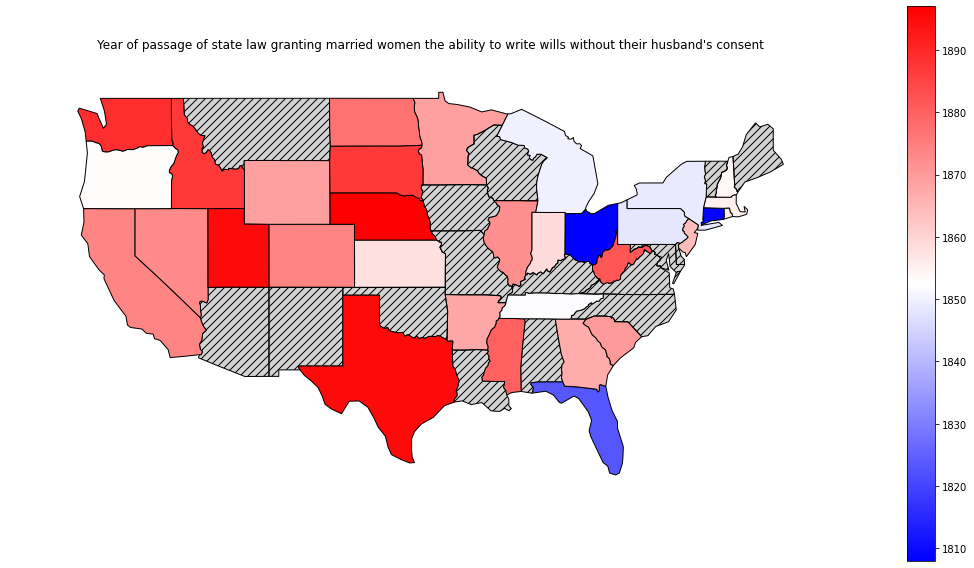

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


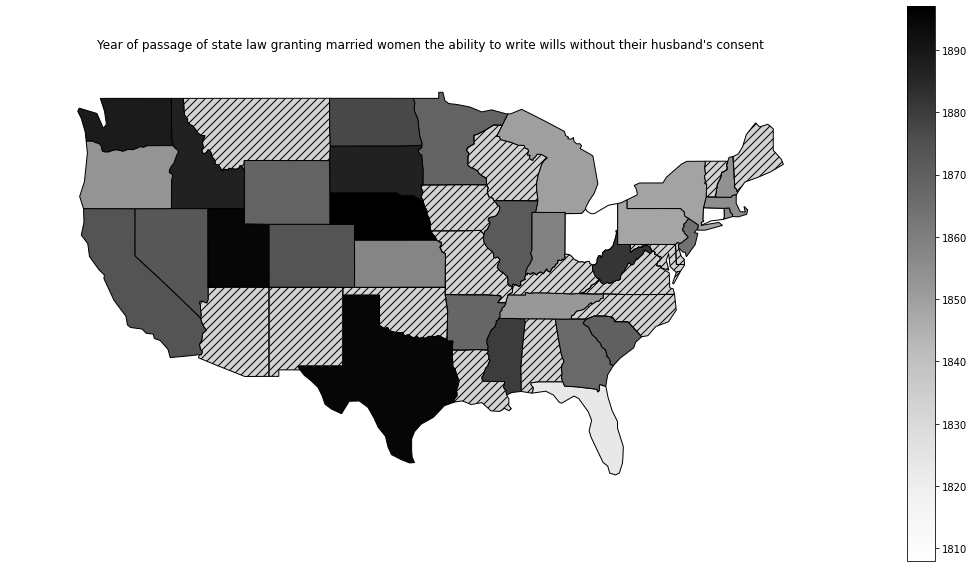

In [4]:
#wills – Year of passage of state law granting married women the ability to write wills without their husband's consent or other restrictions
print(dfjoined['wills'].isna().sum())
ax=geoplot.choropleth(
    dfjoined, hue=dfjoined['wills'],
    cmap='bwr', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.wills.isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title('Year of passage of state law granting married women the ability to write wills without their husband\'s consent')
plt.tight_layout()
plt.show()

#greyscale for publication:
ax3=geoplot.choropleth(
    dfjoined, hue=dfjoined['wills'],
    cmap='Greys', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.wills.isna()].plot(color='lightgrey', hatch='///', ax=ax3)
plt.title('Year of passage of state law granting married women the ability to write wills without their husband\'s consent')
plt.tight_layout()
plt.show()

17


C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


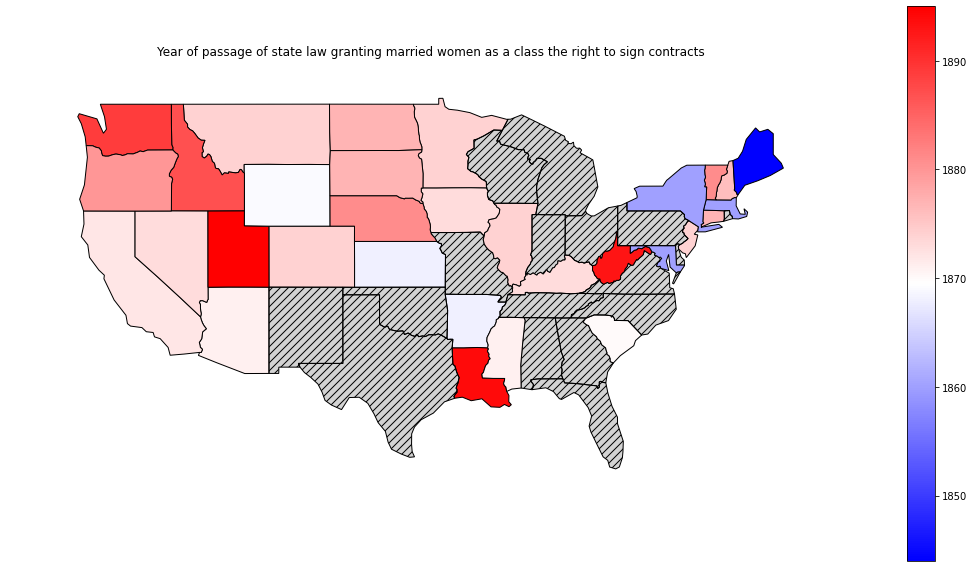

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


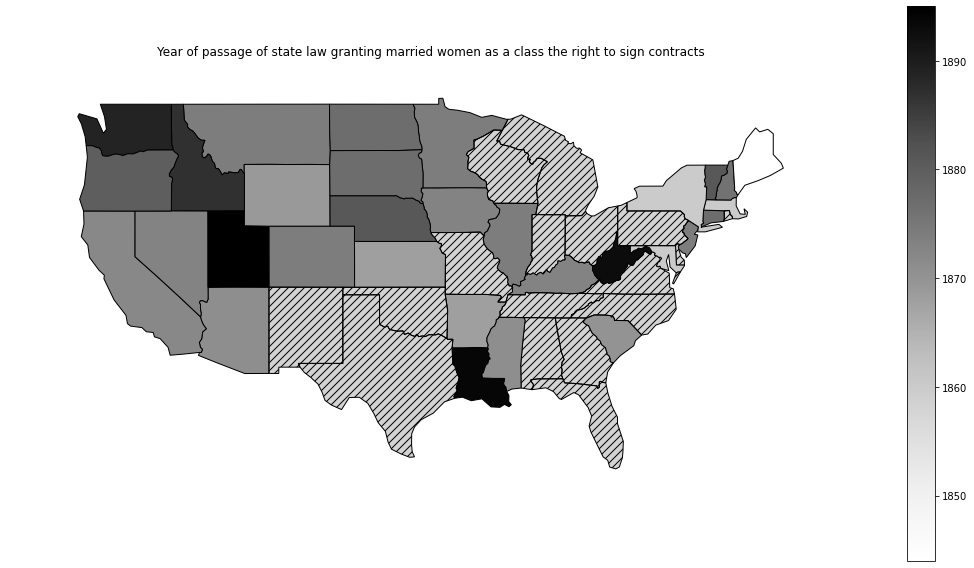

In [5]:
#soletrader – Year of passage of state law granting married women as a class the right to sign contracts and engage in business without consent of husband
print(dfjoined['soletrader'].isna().sum())
ax=geoplot.choropleth(
    dfjoined, hue=dfjoined['soletrader'],
    cmap='bwr', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.soletrader.isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title('Year of passage of state law granting married women as a class the right to sign contracts')
plt.tight_layout()
plt.show()

#greyscale for publication:
ax5=geoplot.choropleth(
    dfjoined, hue=dfjoined['soletrader'],
    cmap='Greys', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.soletrader.isna()].plot(color='lightgrey', hatch='///', ax=ax5)
plt.title('Year of passage of state law granting married women as a class the right to sign contracts')
plt.tight_layout()
plt.show()

1


C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


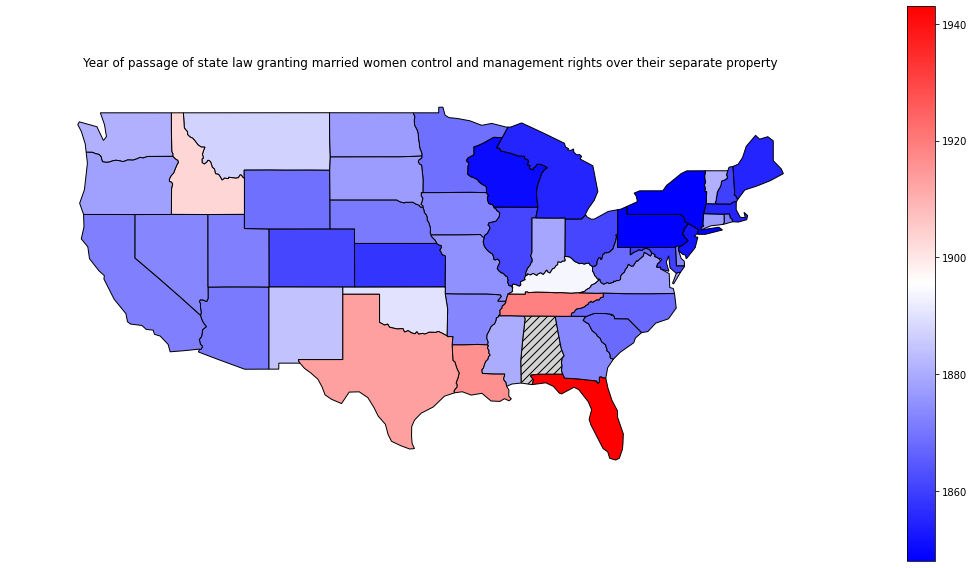

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\geoplot\geoplot.py:66: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


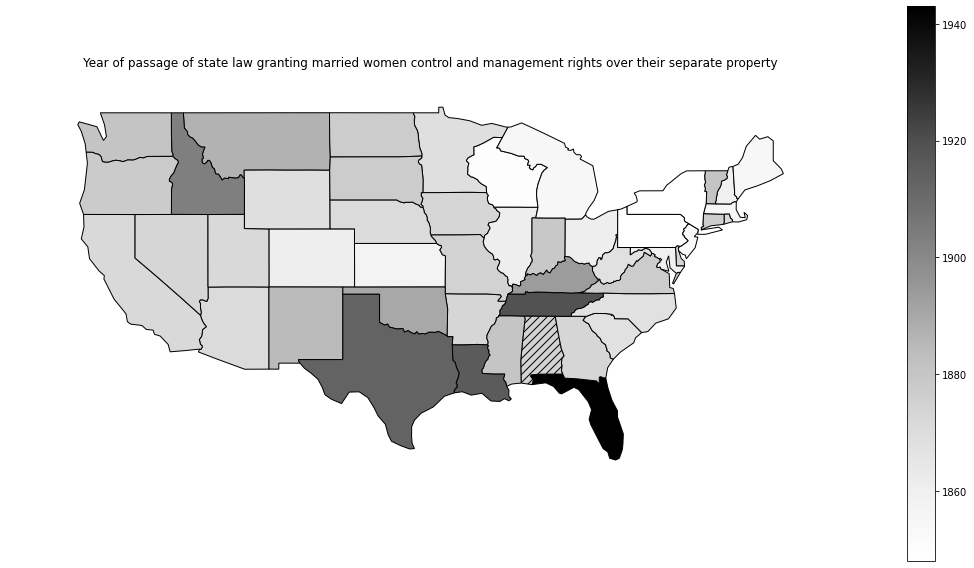

In [6]:
#effectivemwpa – Year of passage of state law granting married women control and management rights over their separate property
print(dfjoined['effectivemwpa'].isna().sum())
ax=geoplot.choropleth(
    dfjoined, hue=dfjoined['effectivemwpa'],
    cmap='bwr', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.effectivemwpa.isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title('Year of passage of state law granting married women control and management rights over their separate property')
plt.tight_layout()
plt.show()

#greyscale for publication:
ax6=geoplot.choropleth(
    dfjoined, hue=dfjoined['effectivemwpa'],
    cmap='Greys', figsize=(15, 8), legend=True)  # blue white red colormap, colored by year of earnings, add a legend
dfjoined[dfjoined.effectivemwpa.isna()].plot(color='lightgrey', hatch='///', ax=ax6)
plt.title('Year of passage of state law granting married women control and management rights over their separate property')
plt.tight_layout()
plt.show()